<a href="https://colab.research.google.com/github/yahdiarif/Final-Project-kel-12/blob/main/Bank_Marketing_Target_Final_Project_(group_12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
 
 
uploaded = files.upload()

Saving train.csv to train.csv


In [53]:
df = pd.read_csv('train.csv', sep = ';')
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20504,47,management,single,tertiary,no,0,no,no,cellular,12,aug,138,2,-1,0,unknown,no
39641,33,admin.,single,tertiary,no,1077,no,no,cellular,26,may,118,2,-1,0,unknown,no
4626,31,services,single,secondary,no,2038,yes,no,unknown,20,may,148,1,-1,0,unknown,no
8943,39,blue-collar,married,primary,no,104,yes,no,unknown,4,jun,624,2,-1,0,unknown,no
21336,48,blue-collar,married,primary,no,199,no,no,telephone,18,aug,29,2,-1,0,unknown,no


In [54]:
#banyak value dengan katagori 'unknown'. jadi kita rubah katagori 'unknown' menjadi NA agar terlihat missing value nya
df=df.replace('unknown', np.nan)

## Descriptive statistic

### Column, Value dan Dtype

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
17. y - has the client subscribed a term deposit? (binary: "yes","no")

### Missing Value

In [56]:
df.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

terdapat beberapa yang ada missing value (job,education,contact,poutcome) yang semuanya categorical

### Statistical Summary

In [57]:
round(df.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [58]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [59]:
(df['y'].value_counts()/df['y'].count())*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

## Univariate Analysis

In [35]:
nums = ['age','balance','campaign','pdays','previous','duration']
cats = ['job','marital','education','contact','poutcome']
cats2=['default','housing','loan']
#untuk heatmap
nums2 = ['age','balance','campaign','pdays','previous','duration','target']


### Boxplot

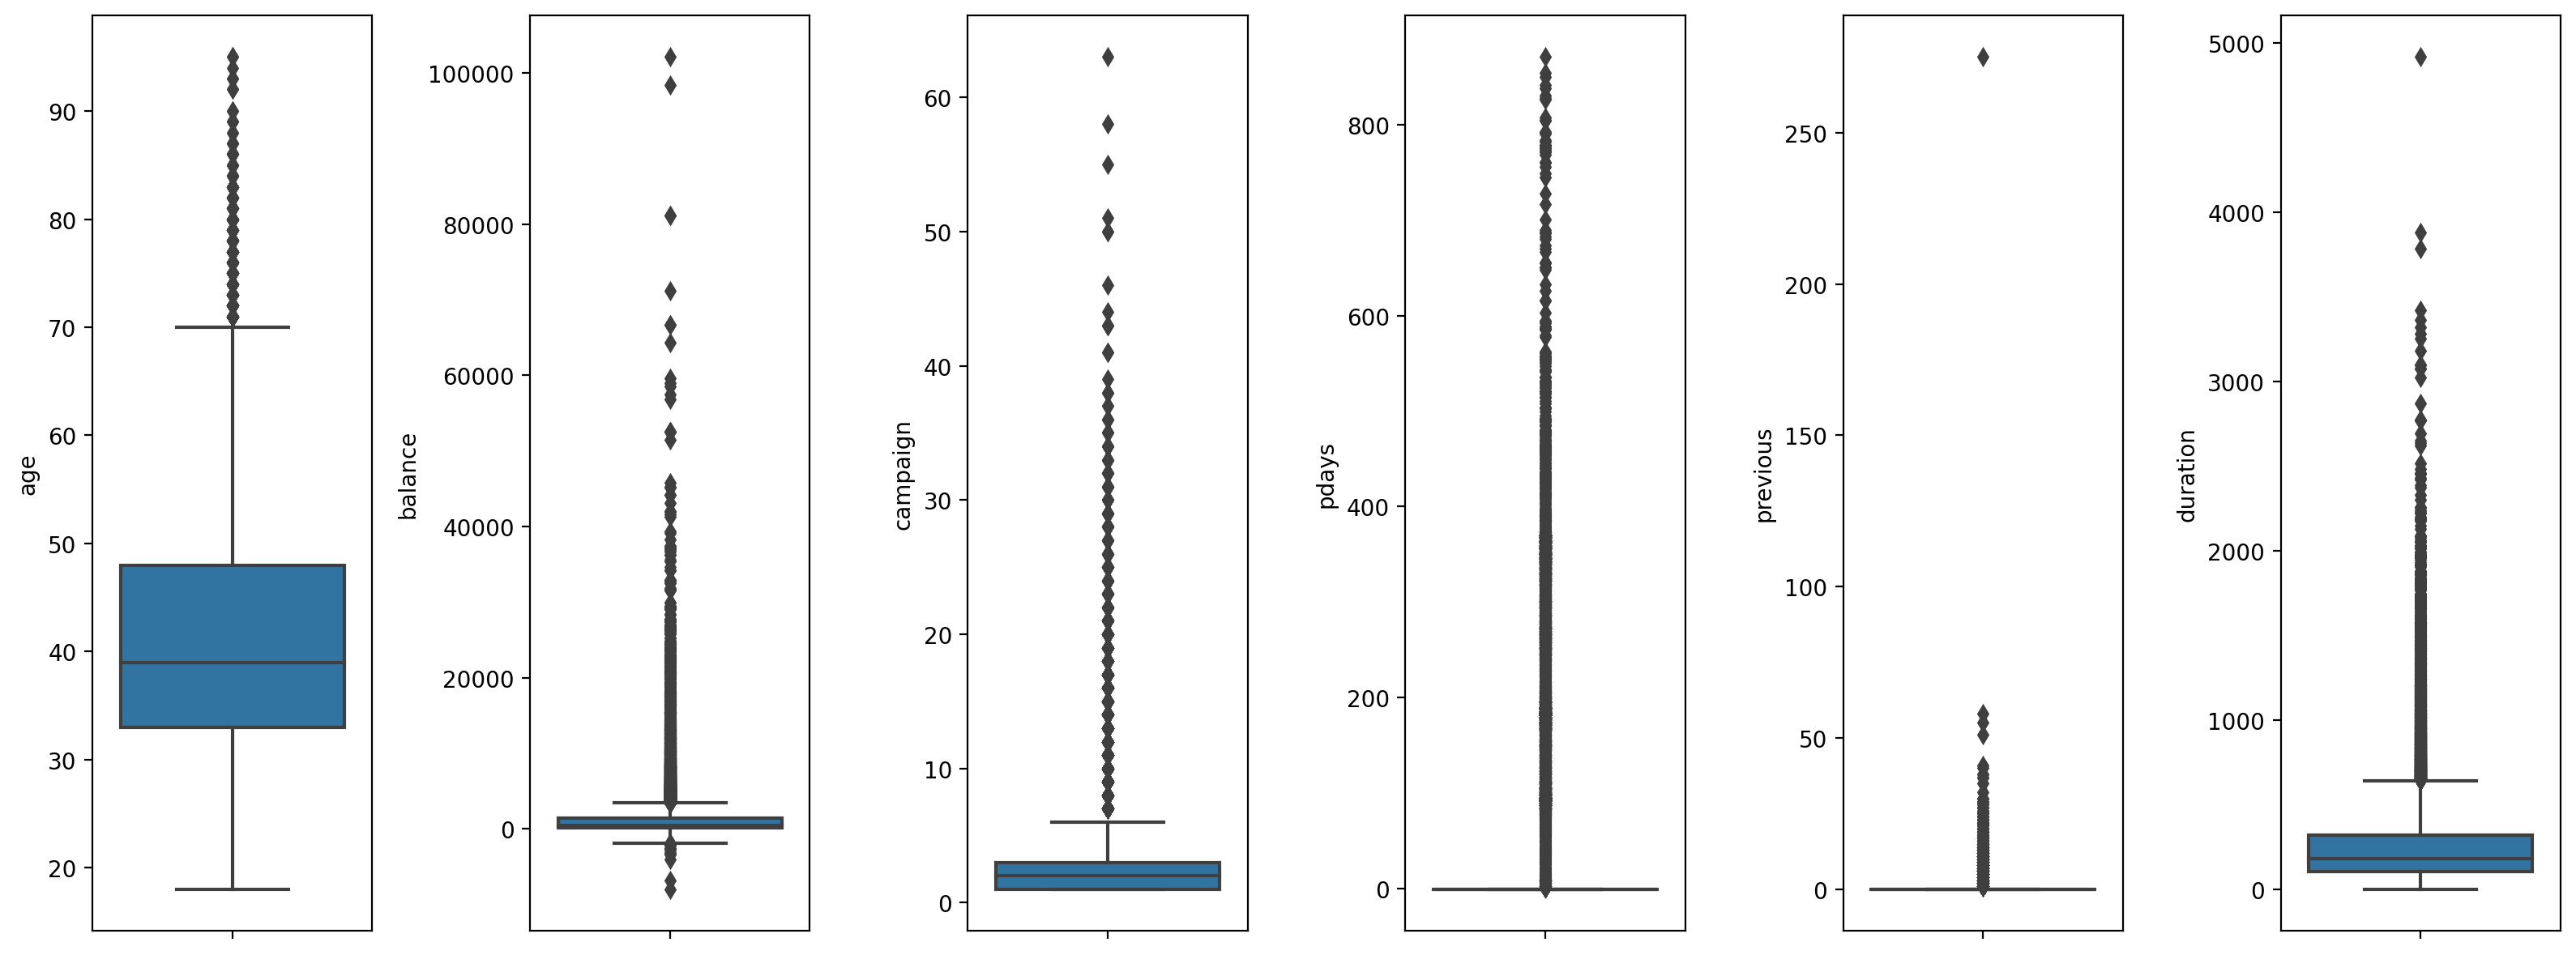

In [60]:
plt.figure(figsize=(16,6),dpi=200)
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()
plt.savefig('boxplot_numerical.jpg')

### kdeplot

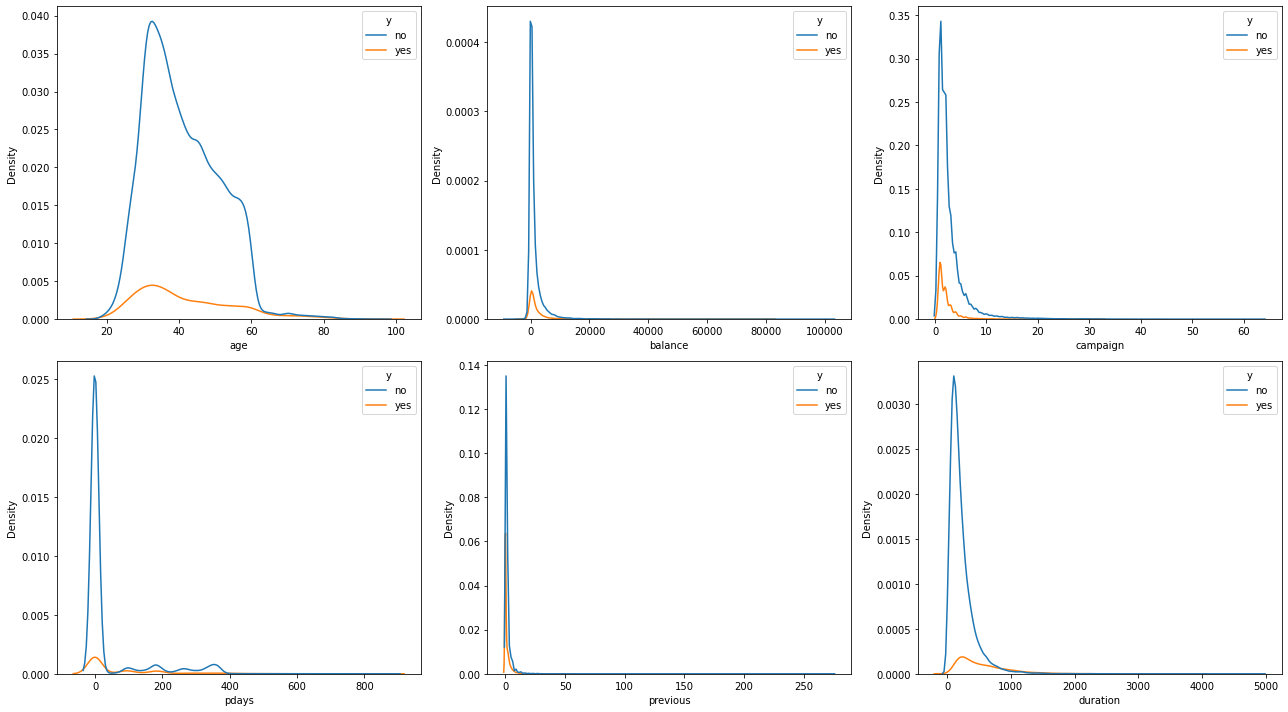

In [61]:
plt.figure(figsize=(18,10))
for i in range(0,len(nums)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[nums[i]],data=df,hue='y')
    plt.xlabel(nums[i])
    plt.tight_layout()
plt.savefig('plot_dist.jpg')

### barplot

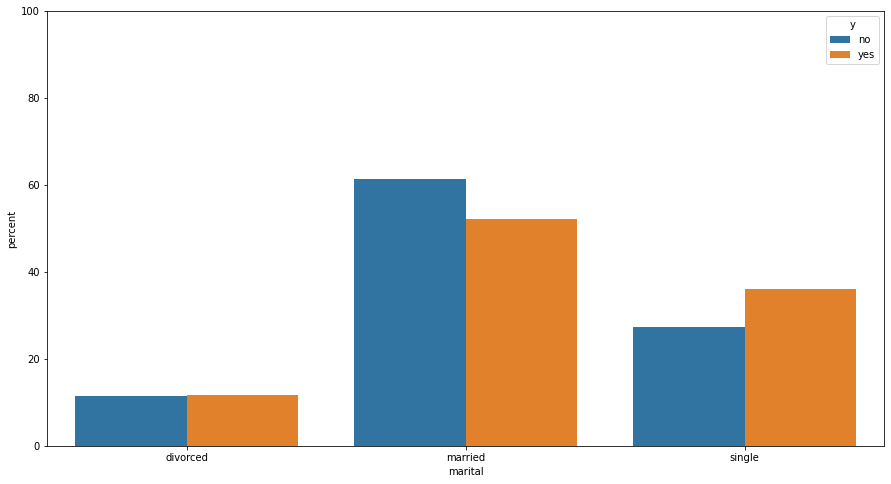

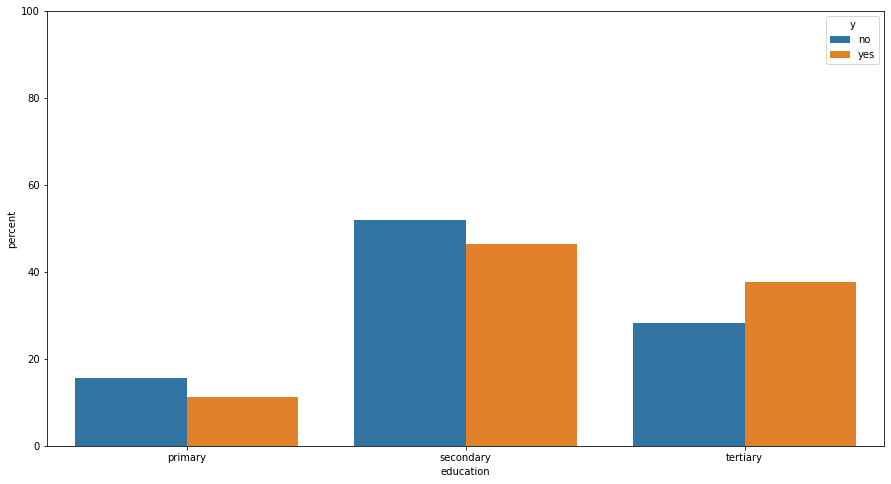

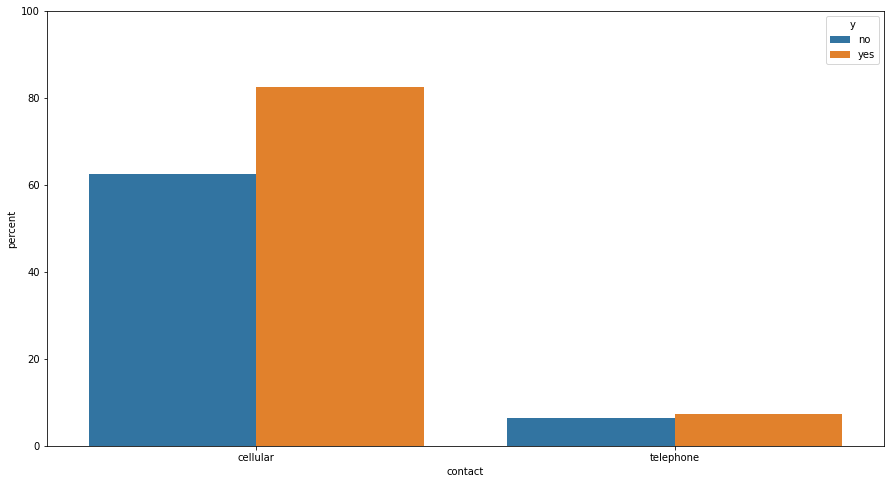

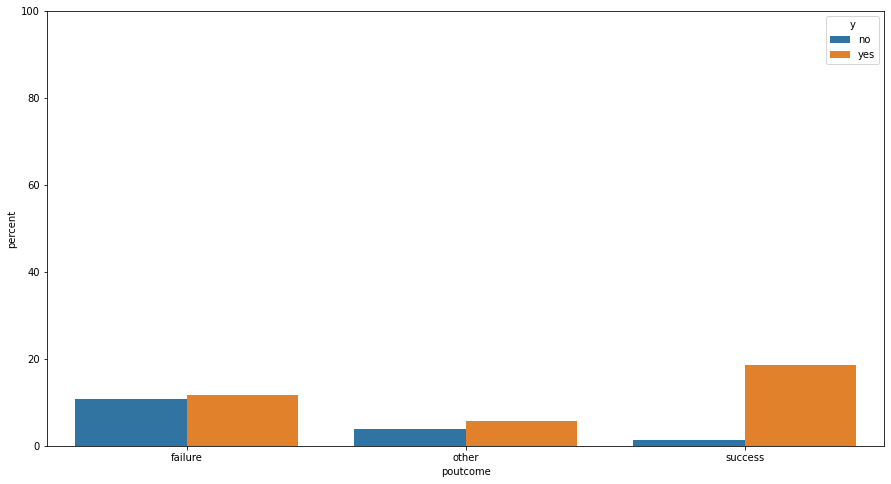

<Figure size 432x288 with 0 Axes>

In [62]:
for i in  range(1, len(cats)):
    plt.figure(figsize=(15,8))
    dfa = df.groupby([cats[i],'y'])['age'].count().reset_index()
    dfa.columns = [cats[i],'y','total']
    dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
    ax = sns.barplot(y='percent',x=cats[i],data = dfa, hue = 'y')
    ax.set(ylim=(0, 100))
    plt.show()
plt.savefig('cats.jpg')

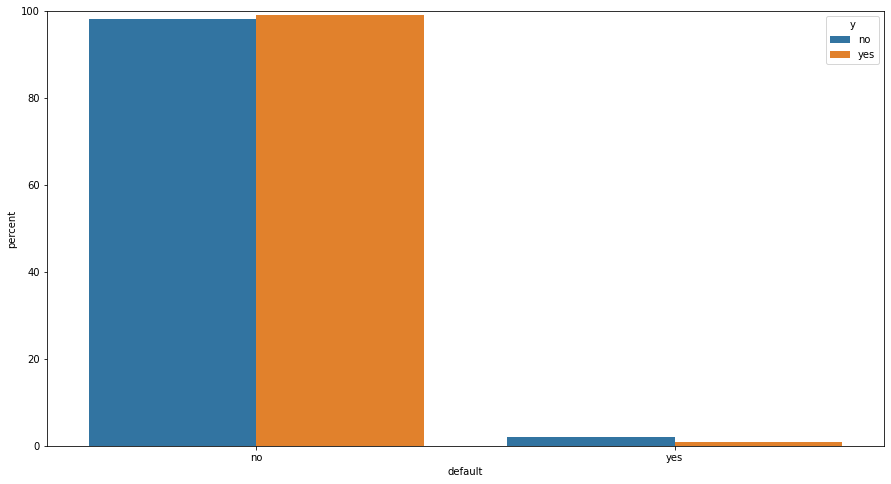

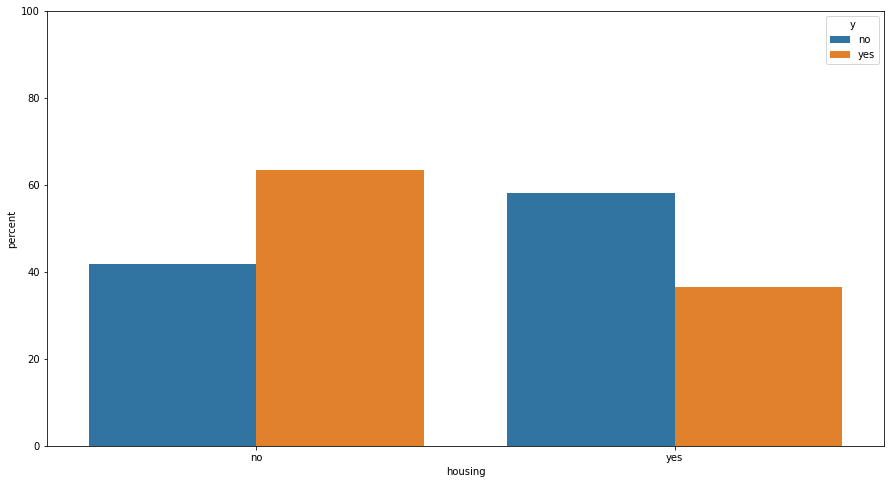

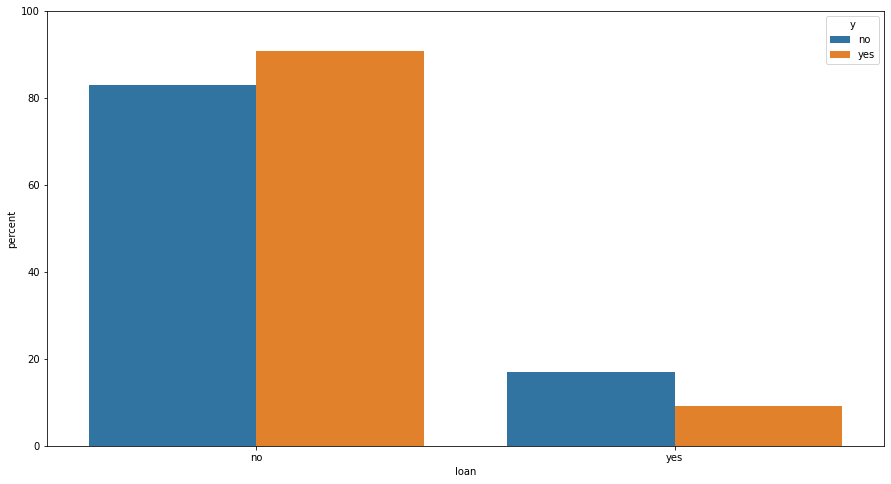

<Figure size 432x288 with 0 Axes>

In [63]:
for i in  range(0, len(cats2)):
    plt.figure(figsize=(15,8))
    dfa = df.groupby([cats2[i],'y'])['age'].count().reset_index()
    dfa.columns = [cats2[i],'y','total']
    dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
    ax = sns.barplot(y='percent',x=cats2[i],data = dfa, hue = 'y')
    ax.set(ylim=(0, 100))
    plt.show()
plt.savefig('cats2.jpg')

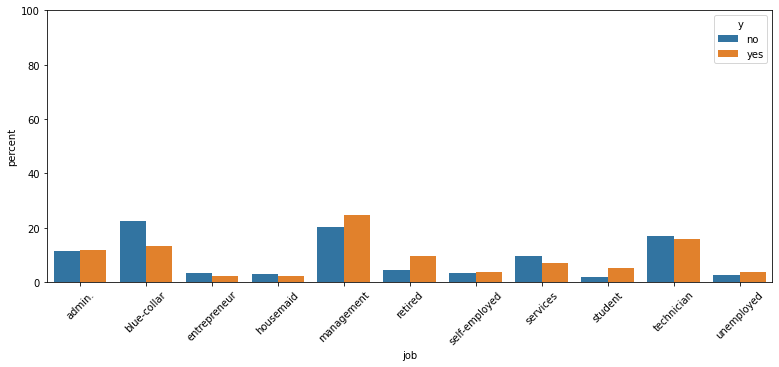

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(13,5))
dfa = df.groupby(['job','y'])['age'].count().reset_index()
dfa.columns = ['job','y','total']
dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
ax = sns.barplot(y='percent',x='job',data = dfa, hue = 'y')
plt.xticks(rotation = 45)
ax.set(ylim=(0, 100))
plt.show()
plt.savefig('job.jpg')

## Multivariate Analysis

### Heatmap

In [65]:
#mapping y jadi angka dan menambahkan kolom ID
mapping={'yes':1,
         'no':0}
df['target']=df['y'].map(mapping)
df.insert(0, 'New_ID', range(1, 1 + len(df)))

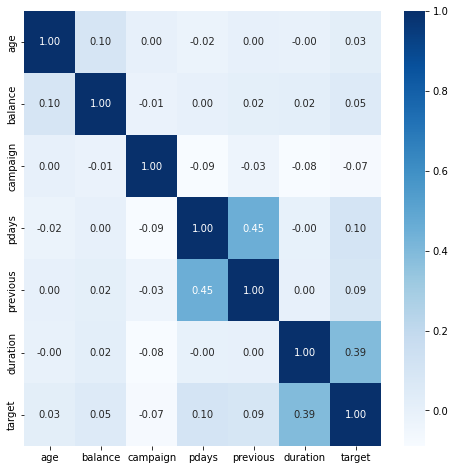

In [66]:

plt.figure(figsize=(8, 8))
sns.heatmap(df[nums2].corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
# Multivariate Analysis

## Business Insight

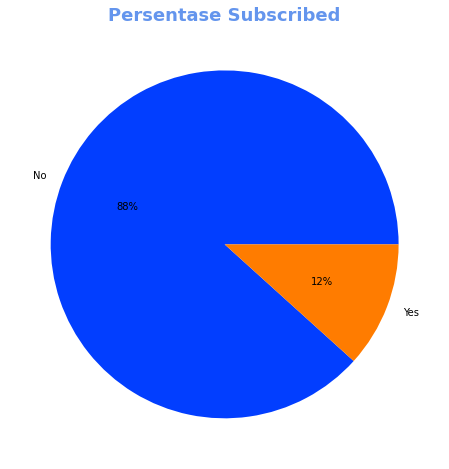

In [67]:
data = [df[df['y']=='no']['y'].count(),df[df['y']=='yes']['y'].count()]
labels = ['No','Yes']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.figure(figsize=(10,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Persentase Subscribed',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.show()

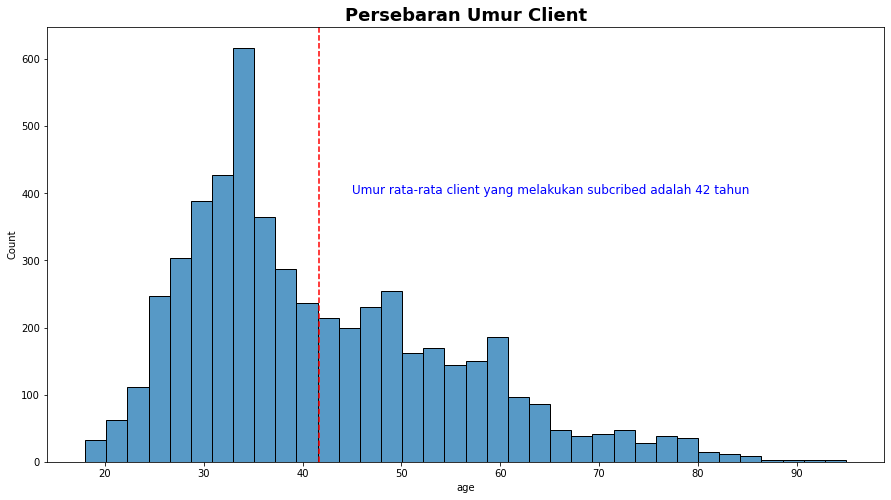

<Figure size 432x288 with 0 Axes>

In [68]:
plt.subplots(figsize=(15,8))
sns.histplot(data=df[df['y']=='yes'][['age','y']], x="age")
plt.axvline(((df[df['y']=='yes'][['age']]).mean().reset_index()[0][0]), linestyle='--', color='red')
plt.title('Persebaran Umur Client', fontsize=18, fontweight='bold')
plt.text(45, 400, s='Umur rata-rata client yang melakukan subcribed adalah 42 tahun',
         fontsize=12,
         color='blue')
plt.show()
plt.savefig('bi1.jpg')

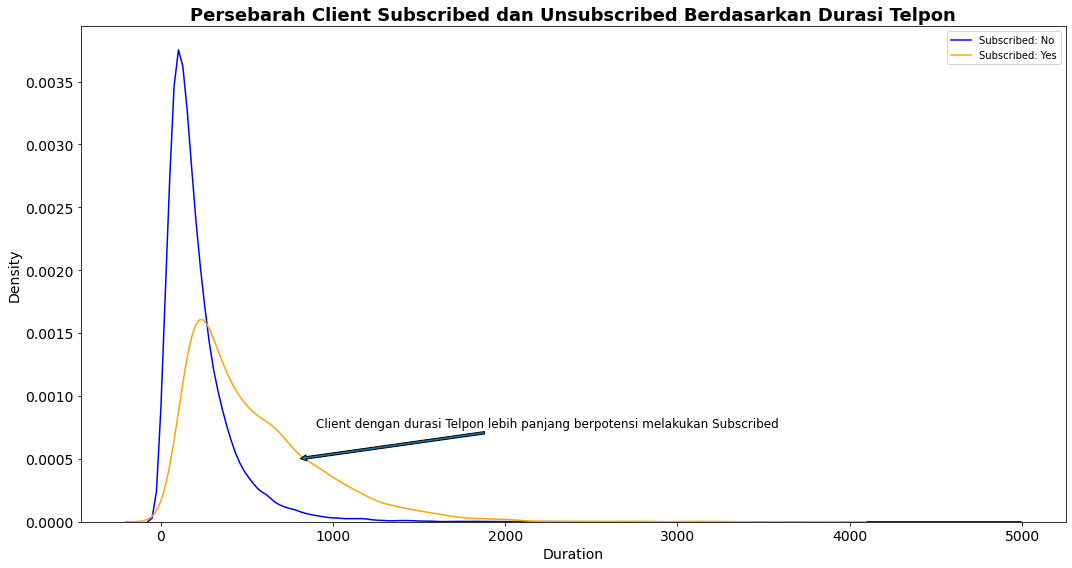

In [69]:

fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['duration'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['duration'], color= 'orange', label= 'Subscribed: Yes', ax=ax)

ax.set_title('Persebarah Client Subscribed dan Unsubscribed Berdasarkan Durasi Telpon',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Duration', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.annotate(xy=(800,0.0005), xytext=(900,0.00075), s='Client dengan durasi Telpon lebih panjang berpotensi melakukan Subscribed', fontsize=12,arrowprops=dict(ec='black',arrowstyle='simple',))
plt.legend()
plt.tight_layout()
plt.savefig('bi2.jpg')

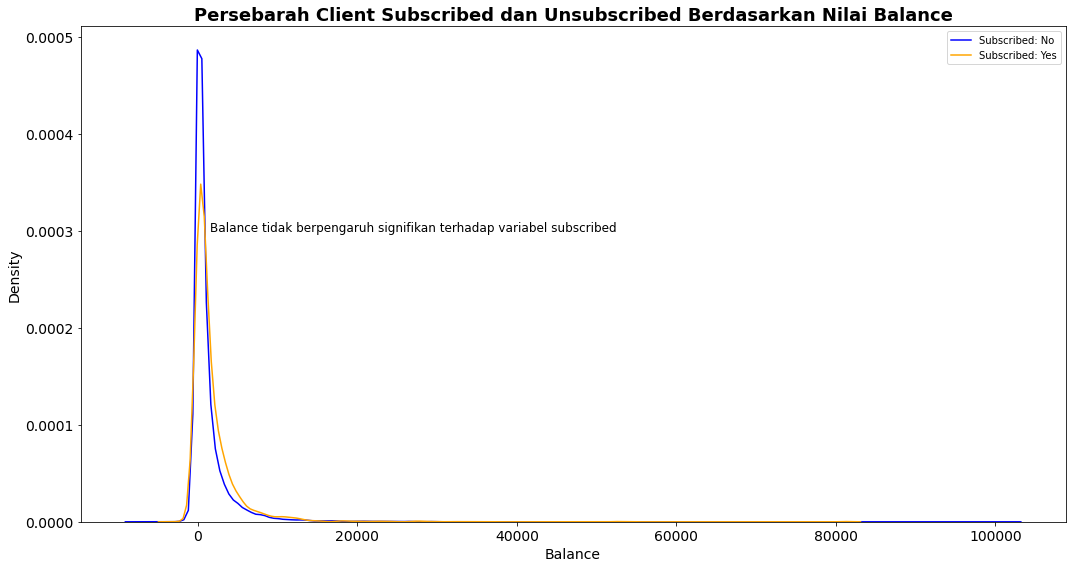

In [70]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['balance'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['balance'], color= 'orange', label= 'Subscribed: Yes', ax=ax)
ax.set_title('Persebarah Client Subscribed dan Unsubscribed Berdasarkan Nilai Balance',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Balance', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.text(1500,0.0003,s='Balance tidak berpengaruh signifikan terhadap variabel subscribed',
         fontsize=12,
         color='black')
plt.legend()
plt.tight_layout()
plt.savefig('bi3.jpg')

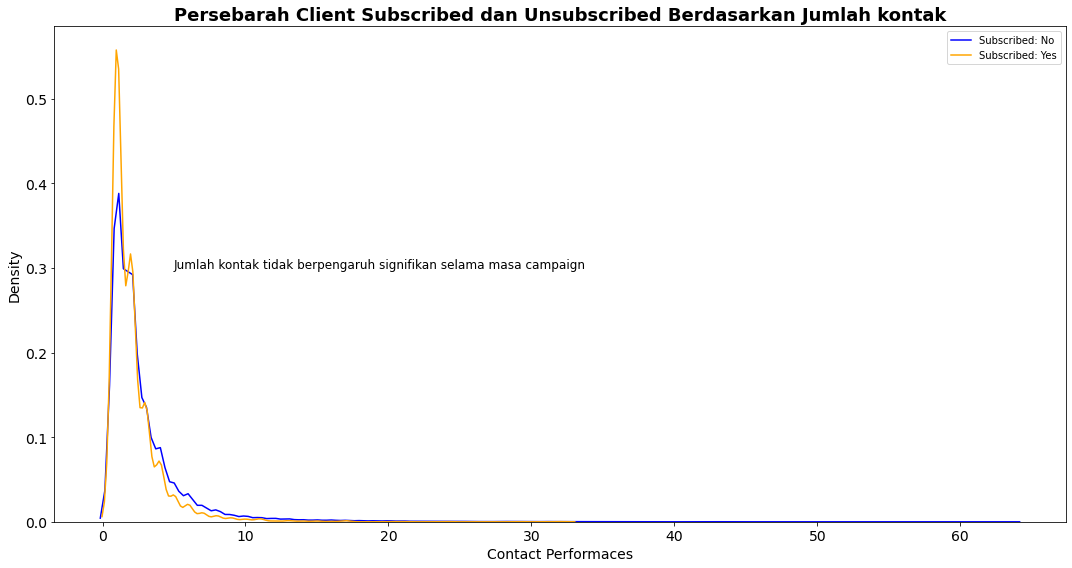

In [71]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['campaign'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['campaign'], color= 'orange', label= 'Subscribed: Yes', ax=ax)
ax.set_title('Persebarah Client Subscribed dan Unsubscribed Berdasarkan Jumlah kontak',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Contact Performaces', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.text(5,0.3,s='Jumlah kontak tidak berpengaruh signifikan selama masa campaign',
         fontsize=12,
         color='black')
plt.legend()
plt.tight_layout()
plt.savefig('bi4.jpg')

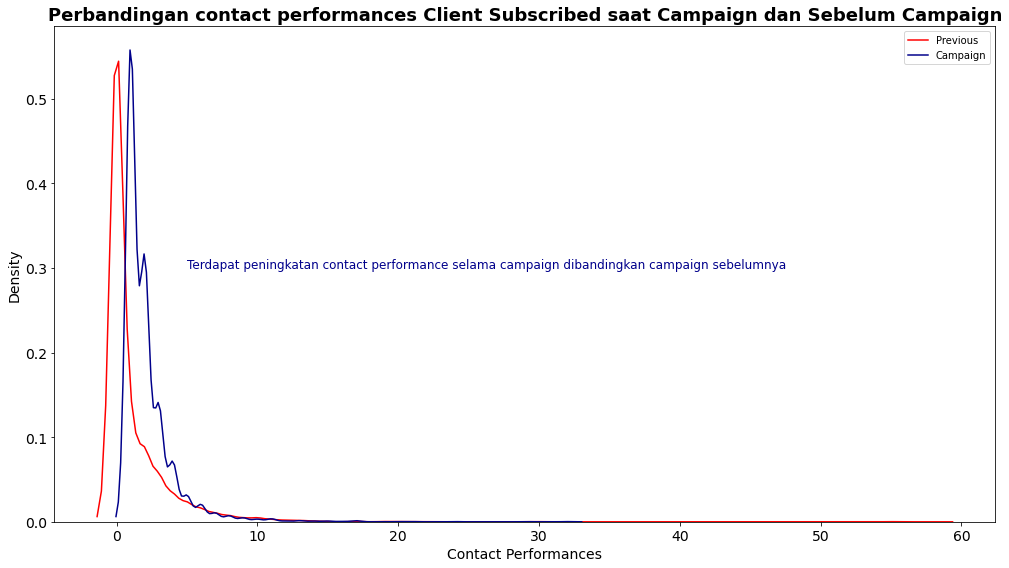

In [72]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='yes']['previous'], color= 'red', label= 'Previous', ax=ax)
sns.kdeplot(df[df['y']=='yes']['campaign'], color= 'darkblue', label= 'Campaign', ax=ax)
#plt.axvline(((df[df['y']=='yes'][['previous']]).mode()['previous'][0]), color='orange',linewidth=0.5)
#plt.axvline(((df[df['y']=='yes'][['campaign']]).mode()['campaign'][0]), color='orange',linewidth=0.5)
ax.set_title('Perbandingan contact performances Client Subscribed saat Campaign dan Sebelum Campaign',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Contact Performances', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.text(5,0.3,s='Terdapat peningkatan contact performance selama campaign dibandingkan campaign sebelumnya',
         fontsize=12,
         color='darkblue')
plt.legend()
plt.tight_layout()
plt.savefig('bi5.jpg')

,Kredit-Pinjaman,y,New_ID_x,New_ID_y,Ratio
0,no-no,no,32685,37453,87.269378
1,no-no,yes,4768,37453,12.730622
2,no-yes,no,6474,6943,93.244995
3,no-yes,yes,469,6943,6.755005
4,yes-no,no,477,514,92.801556
5,yes-no,yes,37,514,7.198444
6,yes-yes,no,286,301,95.016611
7,yes-yes,yes,15,301,4.983389


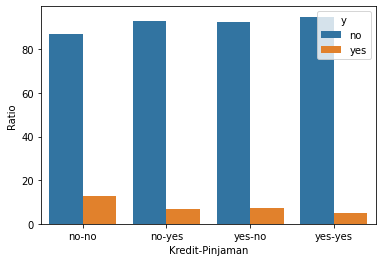

In [73]:
df['Kredit-Pinjaman']=df['default']+'-'+df['loan']
df_dp2=df.groupby(['Kredit-Pinjaman','y'])['New_ID'].nunique().reset_index()
df_dp=df.groupby(['Kredit-Pinjaman',])['New_ID'].nunique().reset_index()
df_union_dp=df_dp2.merge(df_dp,on='Kredit-Pinjaman')
df_union_dp['Ratio']=df_union_dp['New_ID_x']*100/df_union_dp['New_ID_y']
sns.barplot(x="Kredit-Pinjaman", y="Ratio", data=df_union_dp, hue="y")
df_union_dp

,Con-Out,y,New_ID_x,New_ID_y,Ratio
0,1-failure,no,4283,4901,87.390329
1,1-failure,yes,618,4901,12.609671
2,1-other,no,1533,1840,83.315217
3,1-other,yes,307,1840,16.684783
4,1-success,no,533,1511,35.274653
5,1-success,yes,978,1511,64.725347


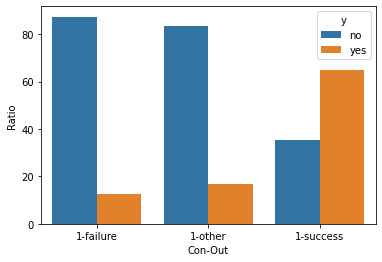

In [74]:
df['contancted']=np.where(df['pdays']>0,1,0)
df['Con-Out']=df['contancted'].map(str)+'-'+df['poutcome']
df_dp2=df.groupby(['Con-Out','y'])['New_ID'].nunique().reset_index()
df_dp=df.groupby(['Con-Out',])['New_ID'].nunique().reset_index()
df_union_dp=df_dp2.merge(df_dp,on='Con-Out')
df_union_dp['Ratio']=df_union_dp['New_ID_x']*100/df_union_dp['New_ID_y']
sns.barplot(x="Con-Out", y="Ratio", data=df_union_dp, hue="y")
df_union_dp

# Stage 2

## Data Cleansing

In [77]:
df2=df.drop(columns=['day', 'month','pdays','Kredit-Pinjaman','contancted','Con-Out'])

In [80]:
df2['job'].fillna(df2['job'].mode()[0], inplace=True)
df2['poutcome'].fillna(df2['poutcome'].mode()[0], inplace=True)
df2['contact'].fillna(df2['contact'].mode()[0], inplace=True)
df2['education'].fillna(df2['education'].mode()[0], inplace=True)
df2.isna().sum()

New_ID       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
previous     0
poutcome     0
y            0
target       0
dtype: int64

In [81]:
df2.sample(5)

,New_ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,target
35216,35217,32,technician,single,tertiary,no,514,yes,yes,cellular,138,1,1,failure,no,0
8637,8638,45,blue-collar,married,primary,no,194,yes,yes,cellular,81,2,0,failure,no,0
36270,36271,37,admin.,single,secondary,no,-17,yes,no,cellular,400,2,2,failure,no,0
24399,24400,47,management,married,tertiary,no,2919,yes,no,cellular,153,1,0,failure,no,0
27731,27732,28,admin.,married,tertiary,no,654,no,no,cellular,198,1,0,failure,no,0


## Handling Outliers

In [85]:
from scipy import stats

In [83]:
# age menggunakan IQR

Q1= df2['age'].quantile(0.25)
Q3= df2['age'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df2['age']>=low_limit)&(df2['age']<=high_limit))
df2=df2[filtered_entries]

In [86]:
##z_scores balance
z_scores=np.abs(stats.zscore(df2['balance']))
filtered_entries=(z_scores<3)
df2=df2[filtered_entries]

In [87]:
##z_scores campaign
z_scores=np.abs(stats.zscore(df2['campaign']))
filtered_entries=(z_scores<3)
df2=df2[filtered_entries]

In [89]:
##z_scores previous
z_scores=np.abs(stats.zscore(df2['previous']))
filtered_entries=(z_scores<3)
df2=df2[filtered_entries]

In [90]:
##z_scores duration
z_scores=np.abs(stats.zscore(df2['duration']))
filtered_entries=(z_scores<3)
df2=df2[filtered_entries] 

### before Imputation outlier

In [91]:
num2 = ['age','balance','campaign','previous','duration']

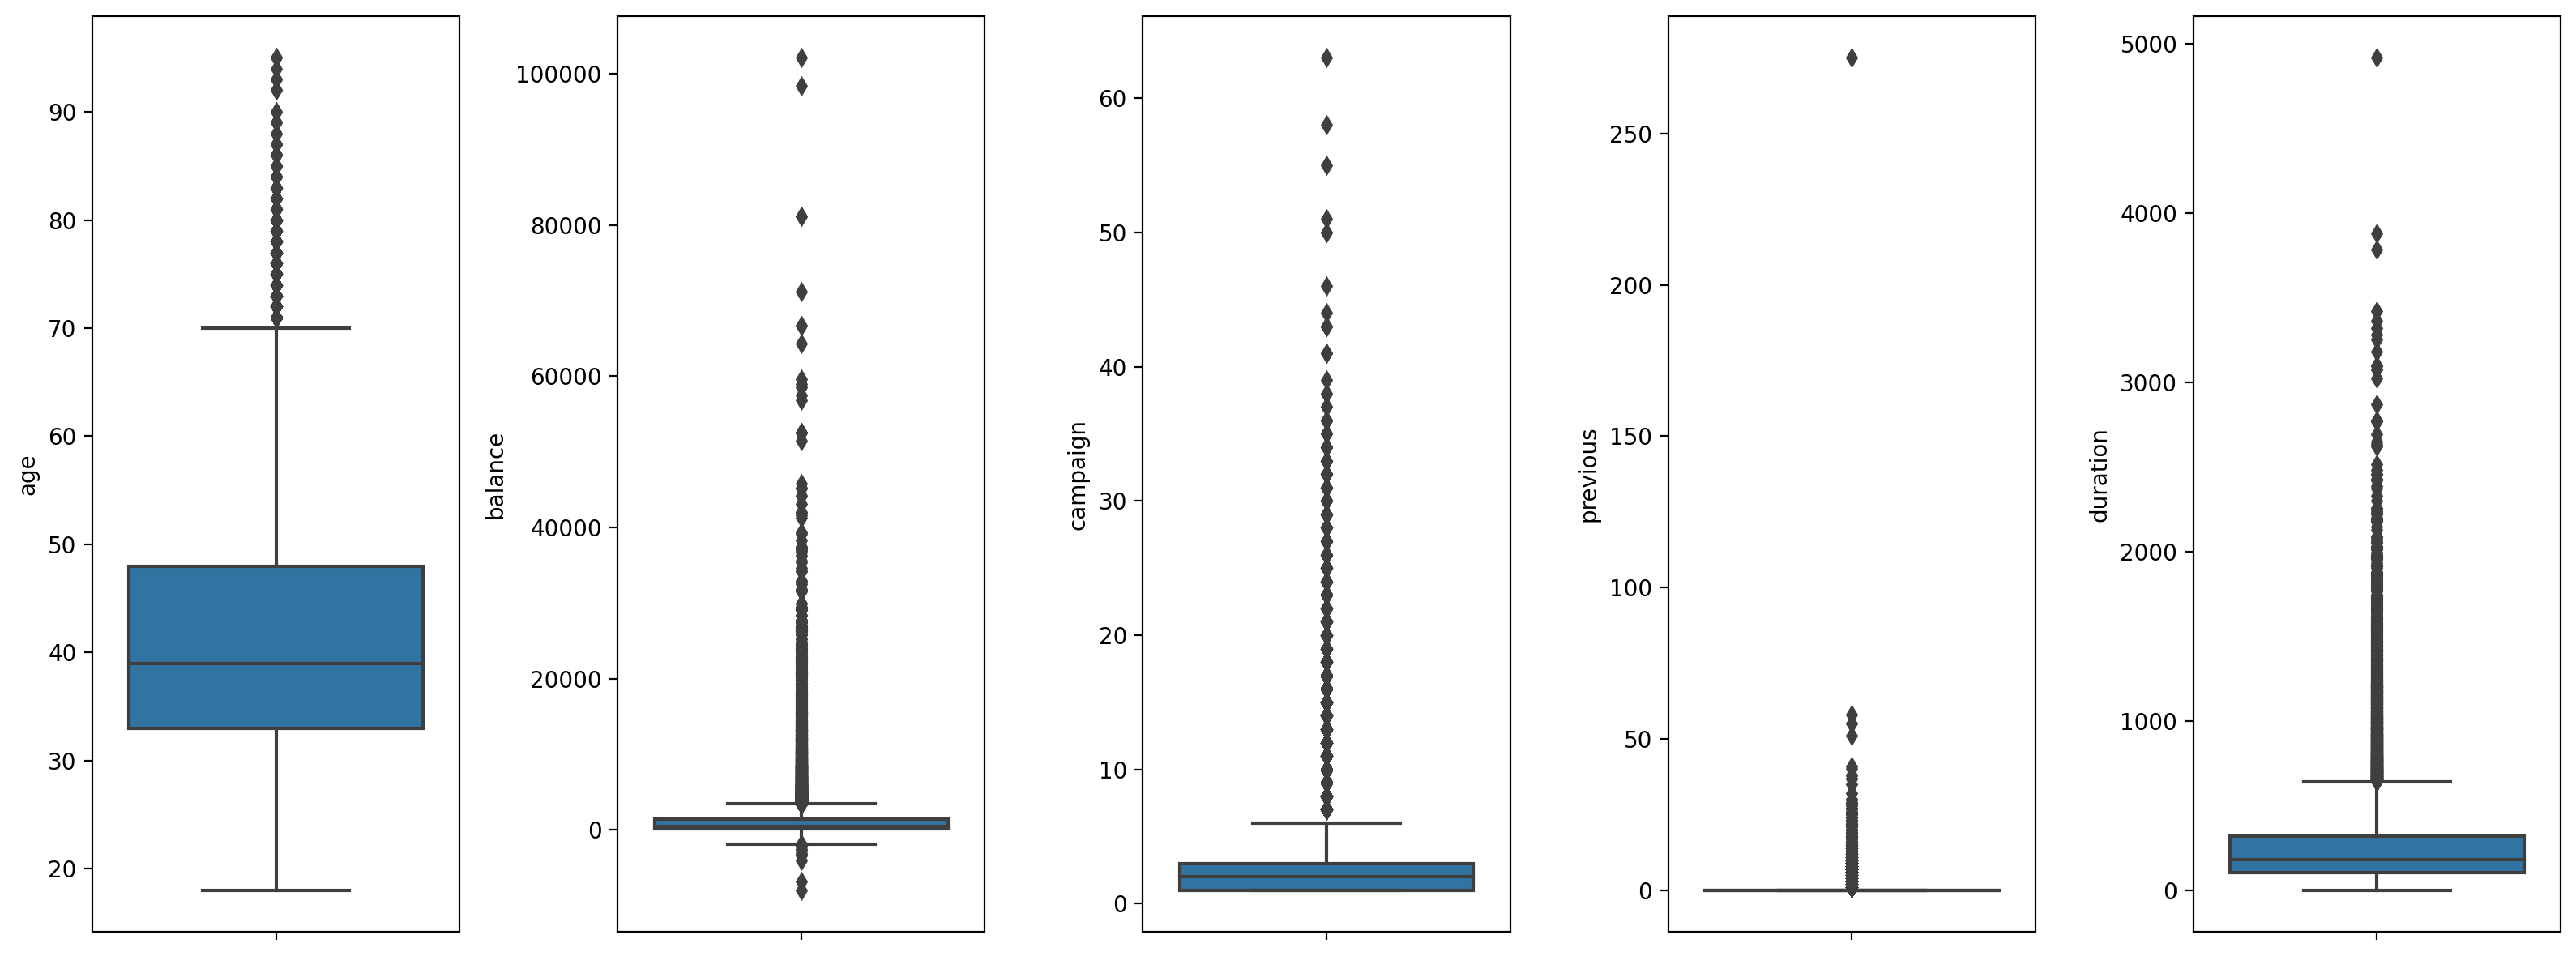

In [92]:
plt.figure(figsize=(16,6),dpi=200)
for i in range(0, len(num2)):
    plt.subplot(1, len(num2), i+1)
    sns.boxplot(y=df[num2[i]])
    plt.tight_layout()
plt.savefig('boxplot_numerical.jpg')

### after Imputation outlier

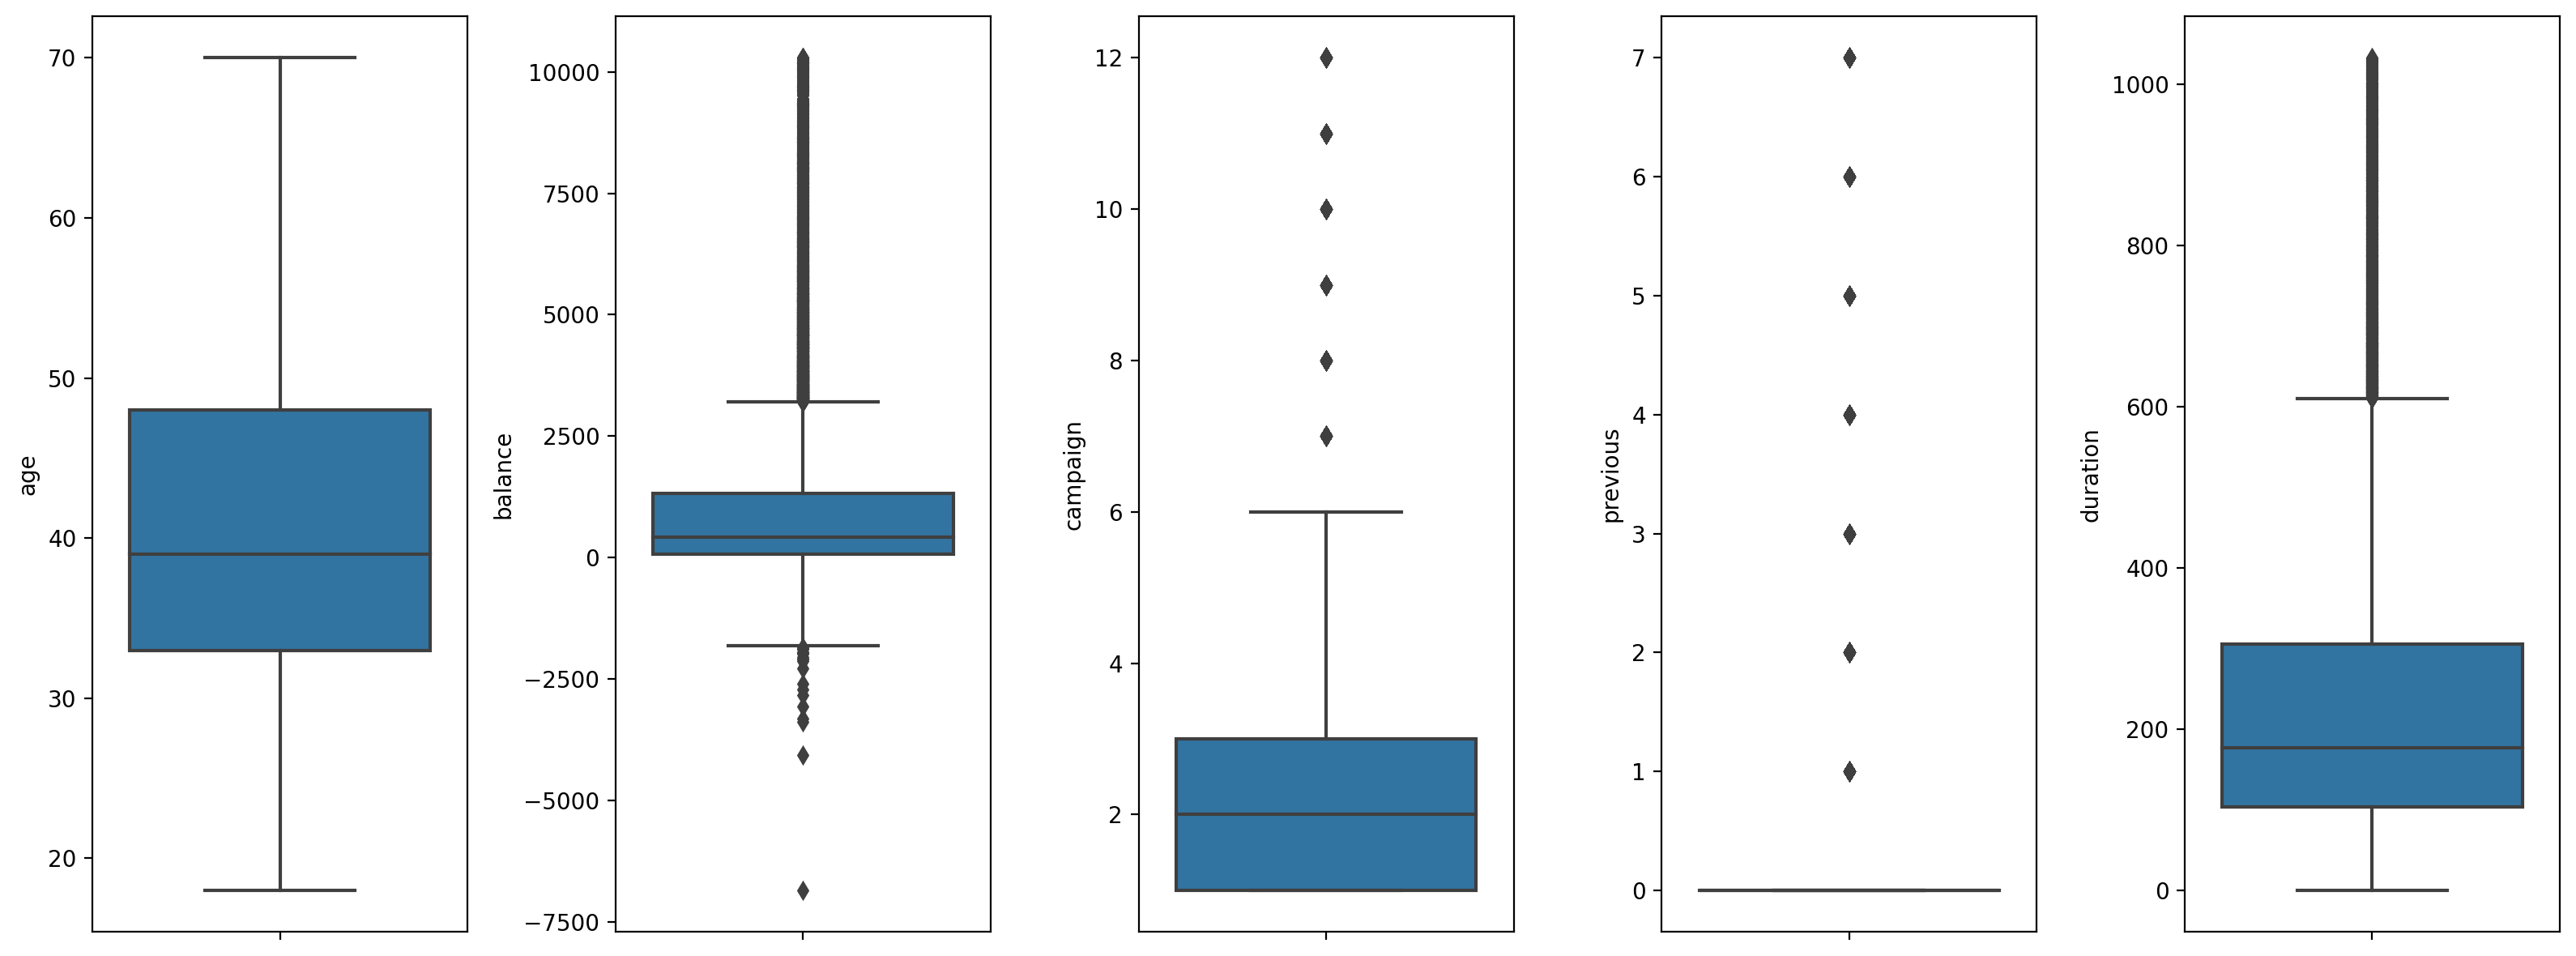

In [93]:
plt.figure(figsize=(16,6),dpi=200)
for i in range(0, len(num2)):
    plt.subplot(1, len(num2), i+1)
    sns.boxplot(y=df2[num2[i]])
    plt.tight_layout()
plt.savefig('boxplot_numerical.jpg')

## Label Encoding

In [94]:
#mapping_y={
#    'yes':1,
#    'no':0
#}
mapping_education={
    'primary':1,
    'secondary':2,
    'tertiary':3
}
mapping_default={
    'yes':1,
    'no':0
}
mapping_housing={
    'yes':1,
    'no':0
}
mapping_loan={
    'yes':1,
    'no':0
}

#df2['y']=df2['y'].map(mapping_y)
df2['education']=df2['education'].map(mapping_education)
df2['default']=df2['default'].map(mapping_default)
df2['housing']=df2['housing'].map(mapping_housing)
df2['loan']=df2['loan'].map(mapping_loan)

In [95]:
df2.sample(5)

,New_ID,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,target
42327,42328,62,retired,married,2,0,298,0,0,cellular,709,2,0,failure,yes,1
42390,42391,28,admin.,married,2,0,330,0,0,cellular,357,1,3,other,yes,1
12933,12934,33,management,single,2,0,1326,0,1,cellular,164,2,0,failure,no,0
20146,20147,45,technician,married,2,0,1410,0,0,cellular,71,2,0,failure,no,0
17667,17668,51,management,married,3,1,0,0,1,cellular,204,6,0,failure,no,0


## One-hot Encoding

In [96]:
df2 = pd.get_dummies(data=df2, columns=['marital'])
df2 = pd.get_dummies(data=df2, columns=['job'])
df2 = pd.get_dummies(data=df2, columns=['contact'])
df2.sample(5)

,New_ID,age,education,default,balance,housing,loan,duration,campaign,previous,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_telephone
41913,41914,53,1,0,2581,0,0,828,1,1,...,1,0,0,0,0,0,0,0,1,0
10,11,41,2,0,270,1,0,222,1,0,...,0,0,0,0,0,0,0,0,1,0
9974,9975,59,1,0,5501,0,0,172,4,0,...,1,0,0,0,0,0,0,0,1,0
43098,43099,33,1,0,396,0,0,382,3,0,...,0,0,0,0,0,0,0,1,1,0
34020,34021,30,2,0,4684,1,0,268,3,0,...,0,0,0,0,0,0,1,0,1,0


## kategori duration

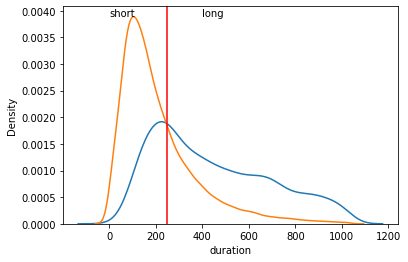

In [109]:
sns.kdeplot(df2[df2['target']==1]['duration'])
sns.kdeplot(df2[df2['target']==0]['duration'])
plt.text(x=0, y=0.0039, s='short')
plt.text(x=400, y=0.0039, s='long')
plt.axvline(x=250,color='red') 

## kategori age

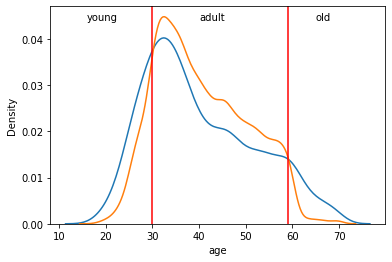

In [115]:
sns.kdeplot(df2[df2['target']==1]['age'])
sns.kdeplot(df2[df2['target']==0]['age'])
plt.text(x=16, y=0.044, s='young')
plt.text(x=40, y=0.044, s='adult')
plt.text(x=65, y=0.044, s='old')
plt.axvline(x=30,color='red') 
plt.axvline(x=59,color='red') 